# Set Up Environment

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Random Forest Model

In [ ]:
def randomForestRegressor(input_file):
    # Load and prepare data
    data = pd.read_csv(input_file)

    # Encode categorical target variable
    label_encoder = LabelEncoder()
    data['Glucose_Level_Range'] = label_encoder.fit_transform(data['Glucose_Level_Range'])

    # Feature/target split
    targets = ['Glucose_15min', 'Glucose_30min', 'Glucose_45min', 'Glucose_60min']
    X = data.drop(targets + ['Time'], axis=1)
    y = data[targets]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

    # Parameter grid for optimization
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of trees
        'max_depth': [None, 10],  # Maximum depth of trees
        'min_samples_split': [2, 5],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 2],  # Minimum samples required at each leaf node
        'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
    }

    # Initialize and run GridSearchCV
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Print best parameters
    print("\nBest Parameters:")
    print(grid_search.best_params_)

    # Evaluate on test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nOverall Test Set Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Calculate ±25% error range accuracy for each time point
    print("\nTime-Specific Accuracy (±25%):")
    for i, target in enumerate(targets):
        lower = 0.75 * y_pred[:, i]
        upper = 1.25 * y_pred[:, i]
        accurate = np.sum((y_test[target].values >= lower) & (y_test[target].values <= upper))
        accuracy = accurate / len(y_pred) * 100
        print(f"{target}: {accuracy:.2f}% accurate")

    # Calculate overall ±25% accuracy
    accurate_predictions = np.all(
        (y_test.values >= 0.75 * y_pred) & (y_test.values <= 1.25 * y_pred),
        axis=1
    )
    overall_accuracy = np.mean(accurate_predictions) * 100
    print(f"\nOverall Accuracy (±25% range): {overall_accuracy:.2f}%")

    print('\n\n')

    # Visualise predictions with error patterns
    plt.figure(figsize=(18, 6))
    
    # Actual vs Predicted with feature importance
    plt.subplot(1, 3, 1)
    target_idx = 0  # Glucose_15min
    plt.scatter(y_test.iloc[:, target_idx], y_pred[:, target_idx], 
               alpha=0.3, color='blue')
    plt.plot([y_test.min().min(), y_test.max().max()], 
             [y_test.min().min(), y_test.max().max()], 
             'r--', lw=1)
    plt.xlabel('Actual Glucose')
    plt.ylabel('Predicted Glucose')
    plt.title(f'Actual vs Predicted ({targets[target_idx]})')
    
    # Error Distribution
    plt.subplot(1, 3, 2)
    errors = y_test.values - y_pred
    plt.boxplot([errors[:, i] for i in range(4)], 
                labels=targets,
                showfliers=False)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.ylabel('Prediction Error (mmol/L)')
    plt.title('Error Distribution by Time Horizon')
    
    # Accuracy by Time Horizon
    plt.subplot(1, 3, 3)
    accuracies = []
    for i in range(4):
        lower = 0.75 * y_pred[:, i]
        upper = 1.25 * y_pred[:, i]
        acc = ((y_test.iloc[:, i] >= lower) & (y_test.iloc[:, i] <= upper)).mean() * 100
        accuracies.append(acc)
    
    plt.bar(targets, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.ylabel('Accuracy (%)')
    plt.title('±25% Accuracy by Time Horizon')
    plt.tight_layout()
    plt.show()

## T1D Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 1.38
MAE: 0.94
R² Score: 0.85

Time-Specific Accuracy (±25%):
Glucose_15min: 98.06% accurate
Glucose_30min: 93.21% accurate
Glucose_45min: 86.85% accurate
Glucose_60min: 80.25% accurate

Overall Accuracy (±25% range): 77.75%





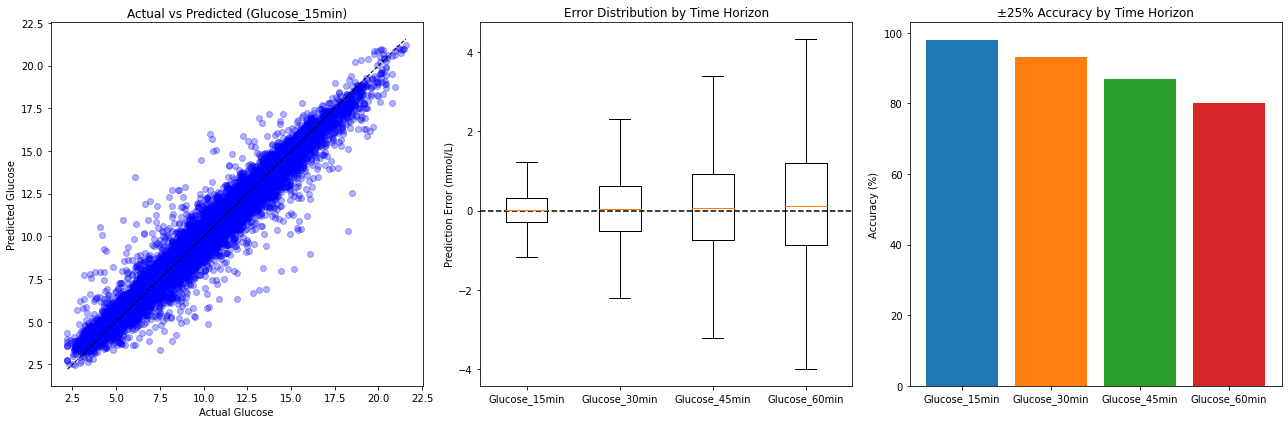

In [22]:
randomForestRegressor('Processed_Data/T1D_Data/combined_T1D_data.csv')

## T2D Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 2.62
MAE: 1.52
R² Score: 0.81

Time-Specific Accuracy (±25%):
Glucose_15min: 95.84% accurate
Glucose_30min: 89.46% accurate
Glucose_45min: 80.33% accurate
Glucose_60min: 71.37% accurate

Overall Accuracy (±25% range): 69.84%





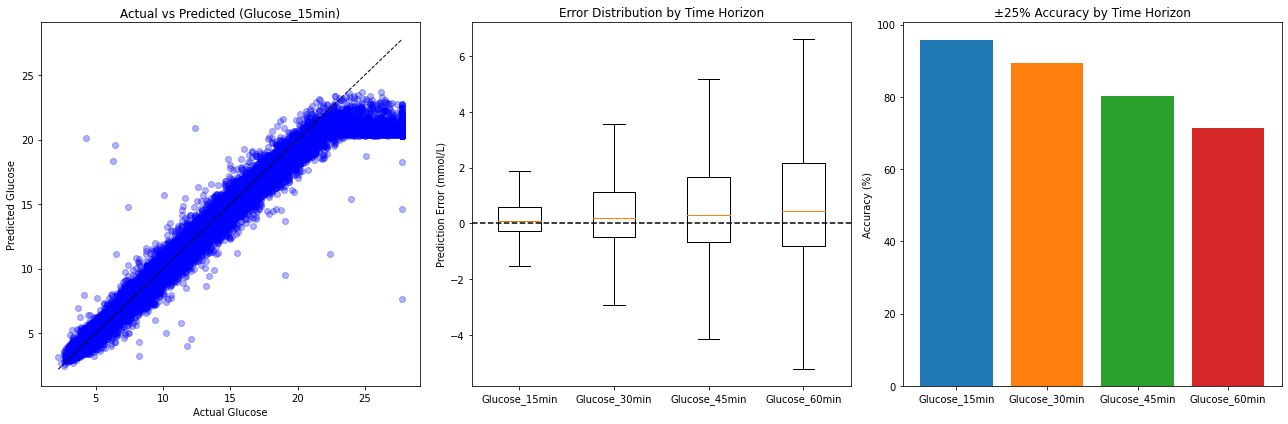

In [23]:
randomForestRegressor('Processed_Data/T2D_Data/combined_T2D_data.csv')

## Ohio Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 1.35
MAE: 0.93
R² Score: 0.86

Time-Specific Accuracy (±25%):
Glucose_15min: 98.39% accurate
Glucose_30min: 93.41% accurate
Glucose_45min: 87.18% accurate
Glucose_60min: 80.49% accurate

Overall Accuracy (±25% range): 78.18%





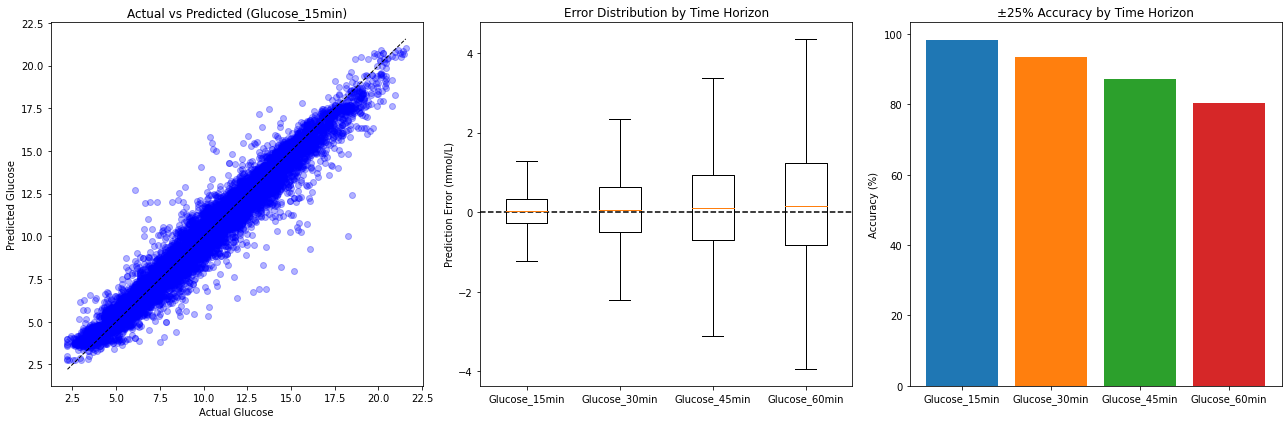

In [24]:
randomForestRegressor('Processed_Data/T1D_Data/combined_ohio_data.csv')

## Shanghai T1D Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 1.45
MAE: 1.04
R² Score: 0.84

Time-Specific Accuracy (±25%):
Glucose_15min: 95.12% accurate
Glucose_30min: 87.50% accurate
Glucose_45min: 80.36% accurate
Glucose_60min: 73.81% accurate

Overall Accuracy (±25% range): 70.60%





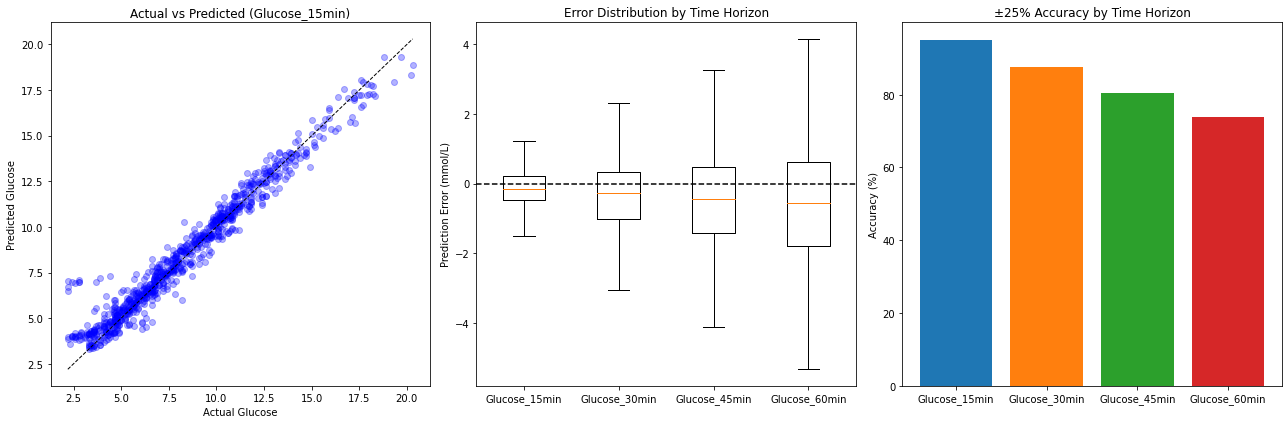

In [25]:
randomForestRegressor('Processed_Data/T1D_Data/combined_shanghait1d_data.csv')

## Shanghai T2D Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 1.05
MAE: 0.69
R² Score: 0.87

Time-Specific Accuracy (±25%):
Glucose_15min: 99.24% accurate
Glucose_30min: 94.85% accurate
Glucose_45min: 89.41% accurate
Glucose_60min: 84.62% accurate

Overall Accuracy (±25% range): 82.77%





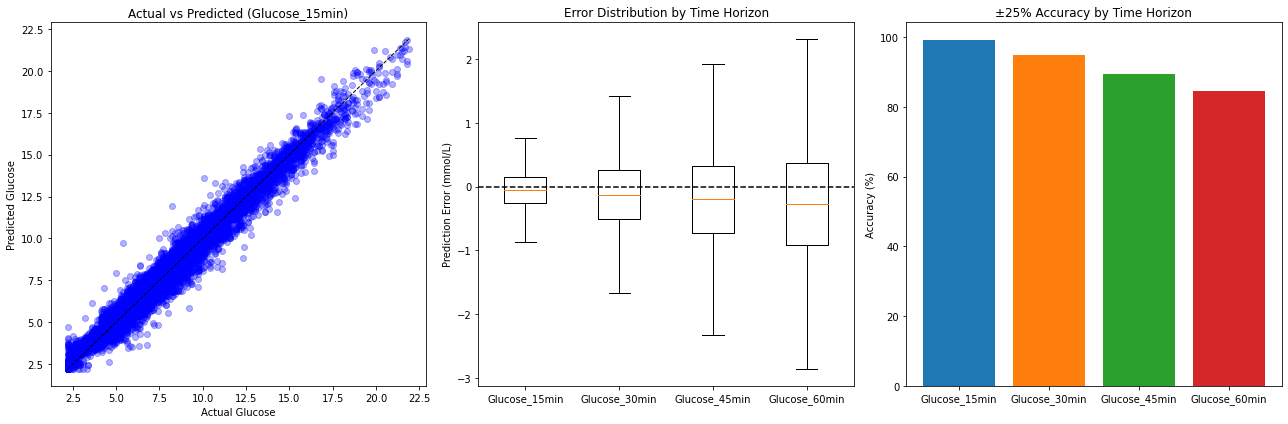

In [26]:
randomForestRegressor('Processed_Data/T2D_Data/combined_shanghait2d_data.csv')

## Participant Data

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Overall Test Set Evaluation:
RMSE: 2.02
MAE: 1.45
R² Score: 0.89

Time-Specific Accuracy (±25%):
Glucose_15min: 99.64% accurate
Glucose_30min: 97.04% accurate
Glucose_45min: 92.02% accurate
Glucose_60min: 85.18% accurate

Overall Accuracy (±25% range): 84.63%





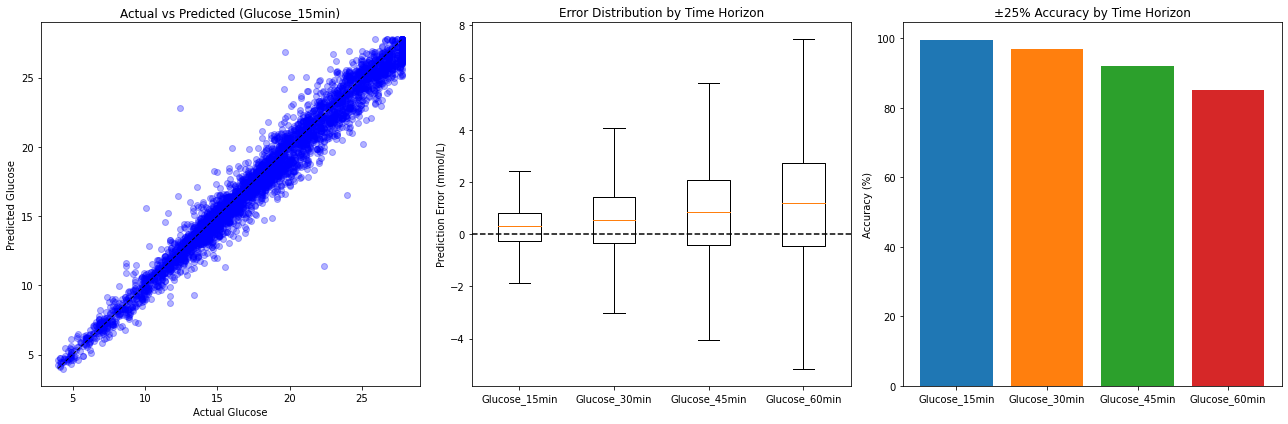

In [28]:
randomForestRegressor('Processed_Data/T2D_Data/participant_data_processed.csv')